# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#основная информация о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.shape

(23699, 22)

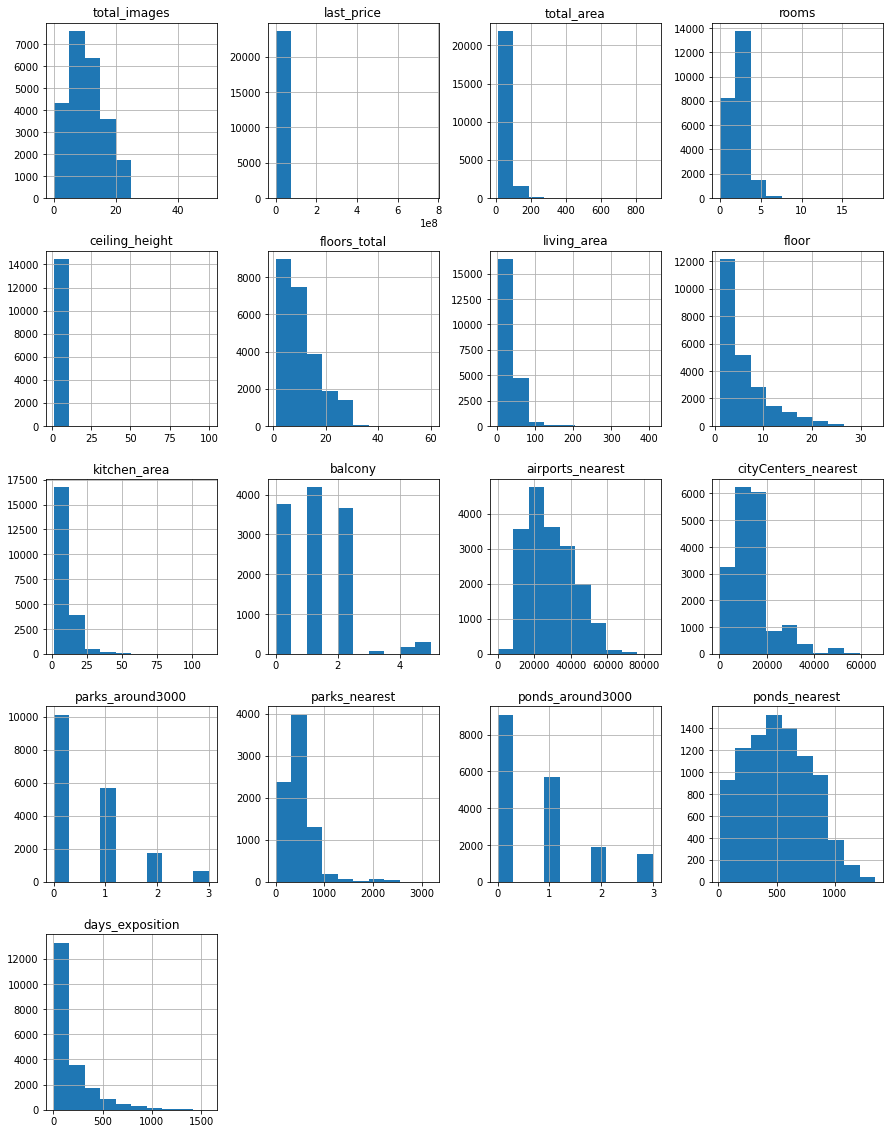

In [ ]:
data.hist(figsize=(15, 20));

In [ ]:
#Узнаём какие есть значения в таблице
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице нет отрицательных значений,есть выбивающиеся значения,например в столбце kitchen_area максимальное значение 112кв.м.,что аномально много. Или например в столбцах living_area total_area есть очень большие значения.

In [ ]:
data.duplicated().sum()

0

### Предобработка данных

In [ ]:
data.sort_values(by='locality_name',ascending=True)['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Заменил неявные дубликаты

In [ ]:
data['locality_name'] = data['locality_name'].replace('поселок  городского типа Рябово','поселок Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок сапёрный','поселок саперный')
data['locality_name'] = data['locality_name'].replace('посёлок сапёрное','поселок саперный')
data['locality_name'] = data['locality_name'].replace('посёлок пансионат зелёный бор','поселок пансионат зеленый бор')
data['locality_name'] = data['locality_name'].replace('поселок цвылёво','поселок цвылево')
data['locality_name'] = data['locality_name'].replace('пикалёво','пикалево')
data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [ ]:
data.sort_values(by='locality_name',ascending=True)['locality_name'].unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок янино-1', 'городской посёлок будогощь',
       'городской посёлок виллози', 'городской посёлок лесогорский',
       'городской посёлок мга', 'городской посёлок назия',
       'городской посёлок новоселье', 'городской посёлок павлово',
       'городской посёлок рощино', 'городской посёлок свирьстрой',
       'городской посёлок советский', 'городской посёлок фёдоровское',
       'городской посёлок янино-1', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [ ]:
data.sort_values(by='locality_name',ascending=True)['locality_name'].unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

In [ ]:
#Смотрим пропуски в столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Удалил пропуски в столбце:
balcony, потому что, их скорей всего нет
ceiling_height,скорей всего продавец не заполнил данные
floors_total, продавались однаитажные дома, либо забыли указать данные
living_area,не указал продавец
is_apartment,данные не указаны
kitchen_area,скорей всего данные не указали из-за того,что кухня совмещена с гостинной,либо забыли внести данные
locality_name,не указал продавец
airports_nearest,скорей всего аэоропорт отсутсвует
cityCenters_nearest,либо центр отсутствует,либо данные не внесли
parks_around3000,parks_nearest,парков нет,либо забыли указать
ponds_around3000,ponds_nearest,водоёмы отсутствуют,либо забыли указать
days_exposition,ещё не продали,либо зыбыли указать продажу

In [ ]:
data = data.fillna({'balcony':0})
data = data.fillna({'is_apartment':0})
data = data.fillna({'parks_around3000':0})
data = data.fillna({'ponds_around3000':0})

In [ ]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Сделал замену типов данных в строке first_day_exposition с строки на дату,чтобы в дальнейшем можно было делать аналитику по месяцам,годам и дням

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [ ]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [ ]:
#ищем неявные дубликаты
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [ ]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [ ]:
data = data[data['rooms'] != 19]
data = data[data['rooms'] != 15]
data = data[data['rooms'] != 12]
data = data[data['rooms'] != 16]
data = data[data['rooms'] != 10]
data = data[data['rooms'] != 14]
data = data[data['rooms'] != 11]
data = data[data['kitchen_area'] != 112]

In [ ]:
data.shape

(23688, 29)

В этой колонке есть аномалии в  высоте поталков,их изменил


In [ ]:
data.loc[data['ceiling_height']== 27.5,'ceiling_height']=2.75
data.loc[data['ceiling_height']== 27,'ceiling_height']=2.7
data.loc[data['ceiling_height']== 32,'ceiling_height']=3.2
data.loc[data['ceiling_height']== 26,'ceiling_height']=2.6
data.loc[data['ceiling_height']== 22.6,'ceiling_height']=2.26
data.loc[data['ceiling_height']== 24,'ceiling_height']=2.4
data.loc[data['ceiling_height']== 100,'ceiling_height']=10.0
data.loc[data['ceiling_height']== 25,'ceiling_height']=2.5
data.loc[data['ceiling_height']== 20,'ceiling_height']=2.0
data.loc[data['ceiling_height']== 1.0,'ceiling_height']=10

In [ ]:
data['rooms'].describe()

count    23688.000000
mean         2.065603
std          1.051309
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

Считаем цену за 1 квадратный метр

In [ ]:
data['price_square_meter'] = data['last_price'] / data['total_area']

Добавляем столбцы: день недели,месяц,год публикации объявления

In [ ]:
data['week_posted'] = data.first_day_exposition.dt.weekday

In [ ]:
data['month_posted'] = data.first_day_exposition.dt.month

In [ ]:
data['year_posted'] = data.first_day_exposition.dt.year

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Делаем категориальные значения для типов этажей

In [ ]:
def floor_type(x):
    if x['floor'] == x['floors_total']:
        return 'последний'
    if x['floor'] == 1:
        return 'первый'
    return 'другое'

In [ ]:
data['floors_type'] = data.apply(floor_type,axis=1)

In [ ]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другое
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другое
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другое
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другое
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0.0,поселок мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,87454.764777,2,5,2018,другое
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другое


Переводим растояние до центра из метров в км

In [ ]:
data['center_km'] = data['cityCenters_nearest'] / 1000

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.028
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,13.933
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другое,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.098


In [ ]:
#Округление до целого числа
data['center_km'] = data['center_km'].round()

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другое,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.0


# Проведите исследовательский анализ данных


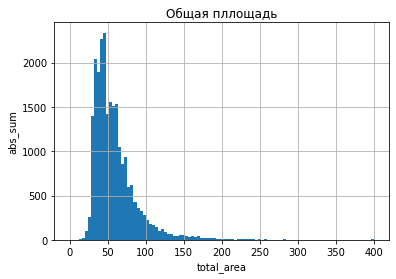

In [ ]:
data['total_area'].hist(bins=100,range=(0,400));
plt.title('Общая пллощадь');
plt.xlabel('total_area');
plt.ylabel('abs_sum');

На графике наглядно видно,что большинство квартир продаются с площадью  от 40 кв.м до 70кв.м

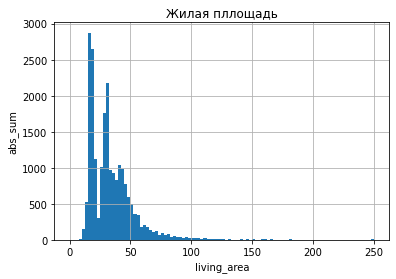

In [ ]:
data['living_area'].hist(bins=100,range=(0,250));
plt.title('Жилая пллощадь');
plt.xlabel('living_area');
plt.ylabel('abs_sum');

Жилая зона же уже гораздо меньше,разброс от 15 до 25

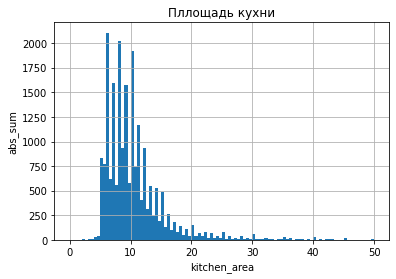

In [ ]:
data['kitchen_area'].hist(bins=100,range=(0,50));
plt.title('Пллощадь кухни');
plt.xlabel('kitchen_area');
plt.ylabel('abs_sum');

In [ ]:
data[data['studio']==True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2.0,поселок мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0,90740.740741,3,3,2017,другое,NaN
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.158982,0,3,2018,другое,15.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0.0,поселок шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0,74000.000000,2,2,2019,другое,NaN
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,True,False,NaN,0.0,деревня кудрово,NaN,NaN,0.0,NaN,0.0,NaN,201.0,103734.439834,4,12,2017,другое,NaN
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0.0,поселок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,88235.294118,2,6,2017,первый,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,False,True,False,NaN,0.0,санкт-петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0,103000.000000,6,12,2017,другое,16.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,False,True,False,NaN,0.0,санкт-петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0,152857.142857,3,10,2017,другое,7.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0.0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0,123076.923077,4,9,2017,другое,13.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,0.0,санкт-петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0,128846.153846,4,9,2018,другое,17.0


На графике видно,что много продавцов не указали квадратуру кухни,решил проверить сколько в продаже студий,для этого сделал нотацию
Большинство квартир продаётся с квадратурой кухни от 5 до 10

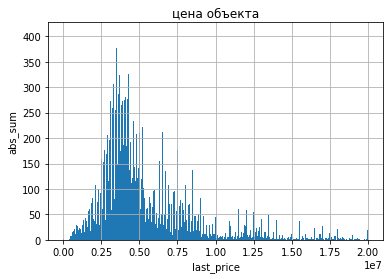

In [ ]:
data['last_price'].hist(bins=500,range=(0,20000000));
plt.title('цена объекта');
plt.xlabel('last_price');
plt.ylabel('abs_sum');

График показывает,что большинство квартир продаётся за 3-4 млн.но есть и аномальные выбросы такие как 620к и 20млн.

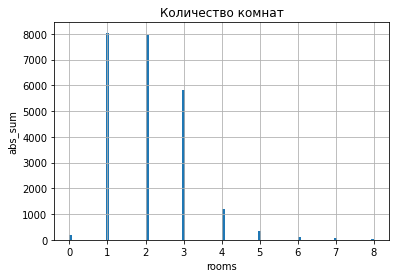

In [ ]:
data['rooms'].hist(bins=100,range=(0,8));
plt.title('Количество комнат');
plt.xlabel('rooms');
plt.ylabel('abs_sum');

График показывает,что большинство квартир находящихся в продаже имеют 1-2 комнаты

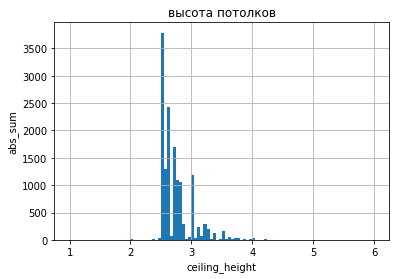

In [ ]:
data['ceiling_height'].hist(bins=100,range=(1,6));
plt.title('высота потолков');
plt.xlabel('ceiling_height');
plt.ylabel('abs_sum');

График показывает,что большинство квартир имеют высоту потолков 2.5 метра

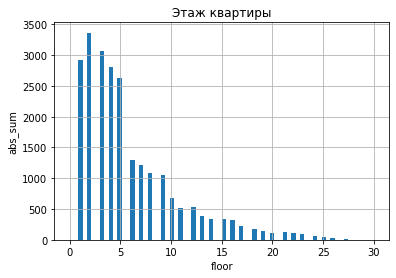

In [ ]:
data['floor'].hist(bins=70,range=(0,30));
plt.title('Этаж квартиры');
plt.xlabel('floor');
plt.ylabel('abs_sum');

График показывает,что большинство квартир находятся на первых 5 этажах

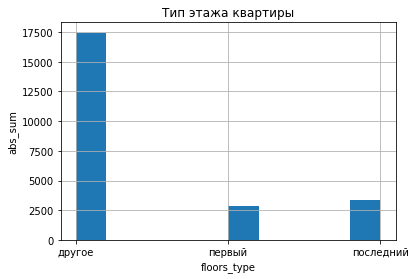

In [ ]:
data['floors_type'].hist();
plt.title('Тип этажа квартиры');
plt.xlabel('floors_type');
plt.ylabel('abs_sum');

График показывает,что большинство квартир находятся не на первом и не на последнем этажах

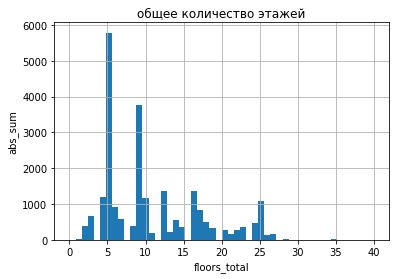

In [ ]:
data['floors_total'].hist(bins=50,range=(0,40));
plt.title('общее количество этажей');
plt.xlabel('floors_total');
plt.ylabel('abs_sum');

График показывает,что большинство квартир находятся в пятиэтажках

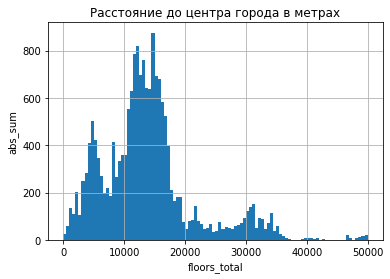

In [ ]:
data['cityCenters_nearest'].hist(bins=100,range=(0,50000));
plt.title('Расстояние до центра города в метрах');
plt.xlabel('floors_total');
plt.ylabel('abs_sum');

График показывает,что большинство квартир находятся в 15 км от центра, и что многие не указали наличие центра

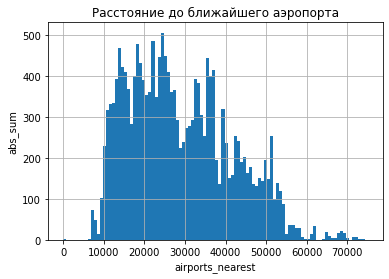

In [ ]:
data['airports_nearest'].hist(bins=100,range=(0,75000));
plt.title('Расстояние до ближайшего аэропорта');
plt.xlabel('airports_nearest');
plt.ylabel('abs_sum');

График показывает,что растояние до ближайшего аэропорта у большинства квартир состовляет 12-22км

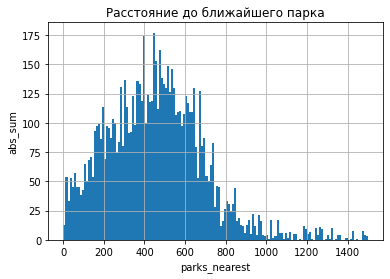

In [ ]:
data['parks_nearest'].hist(bins=150,range=(1,1500));
plt.title('Расстояние до ближайшего парка');
plt.xlabel('parks_nearest');
plt.ylabel('abs_sum');

График показывает,что растояние до ближайшего парка у большинства квартир составляет 500м

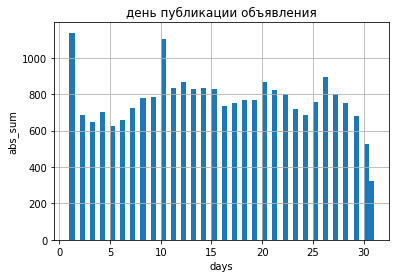

In [ ]:
data['day_posted'] = data.first_day_exposition.dt.day
data['day_posted'].hist(bins=60,range=(1,31));
plt.title('день публикации объявления');
plt.xlabel('days');
plt.ylabel('abs_sum');

График показывает,что большинство квартир выставлялись на продажу 1 и 10 числа месяца

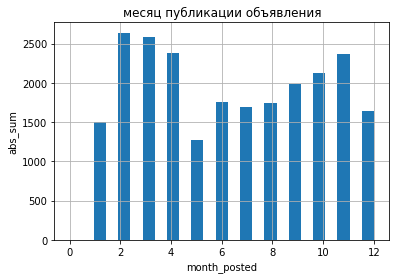

In [ ]:
data['month_posted'].hist(bins=25,range=(0,12));
plt.title('месяц публикации объявления');
plt.xlabel('month_posted');
plt.ylabel('abs_sum');

График показывает,что большинство квартир выставлялись на продажу в феврале,марте,ноябре

In [ ]:
data[data['days_exposition']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km,day_posted


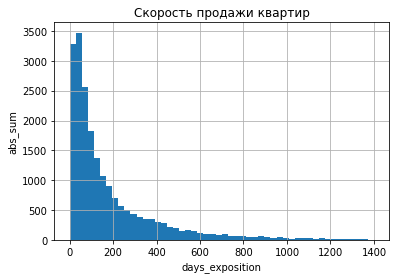

In [ ]:
data['days_exposition'].hist(bins=50,range=(0,1400));
plt.title('Скорость продажи квартир');
plt.xlabel('days_exposition');
plt.ylabel('abs_sum');

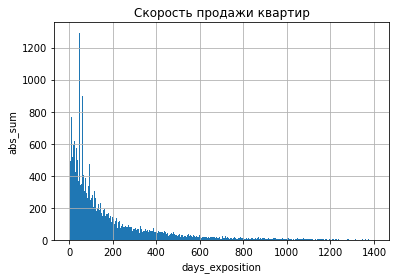

In [ ]:
data['days_exposition'].hist(bins=300,range=(1,1400));
plt.title('Скорость продажи квартир');
plt.xlabel('days_exposition');
plt.ylabel('abs_sum');

In [ ]:
data['days_exposition'].median()

95.0

In [ ]:
data['days_exposition'].mean()

180.82110293042078

In [ ]:
data['days_exposition'].describe()

count    20509.000000
mean       180.821103
std        219.560550
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Графики показывают,что многие не указали за сколько времени была продана квартира,медиана показывает,что квартиры продавались за 95 дней. Продажи от 0 до 45 можно считать быстрыми,а все что от 230 дней и выше - необычно долгими

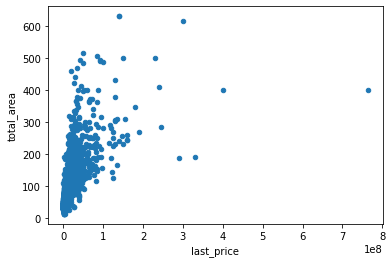

In [ ]:
data.sort_values('last_price').plot(x='last_price',y='total_area',kind='scatter');

In [ ]:
data['total_area'].corr(data['last_price'])

0.6437899730302453

График и корреляция показывает,что цена квартиры зависит от площади квартиры

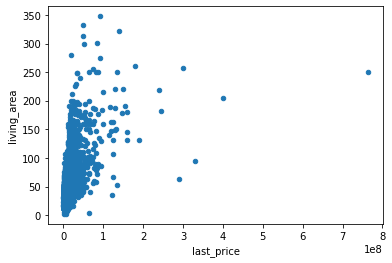

In [ ]:
data.sort_values('last_price').plot(x='last_price',y='living_area',kind='scatter');

In [ ]:
data['total_area'].corr(data['last_price']);

График и корреляция показывает,что цена квартиры зависит от жилой площади квартиры

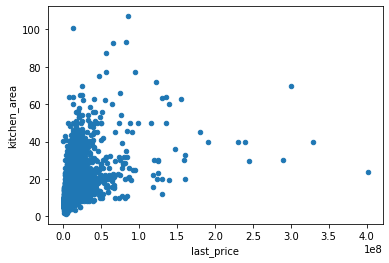

In [ ]:
data.sort_values('last_price').plot(x='last_price',y='kitchen_area',kind='scatter');

In [ ]:
data['kitchen_area'].corr(data['last_price'])

0.509328347845081

График и корреляция показывает,что цена квартиры зависит от размера кухни

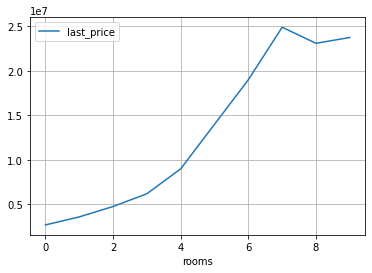

In [ ]:
rooms_pivot = data.pivot_table(index='rooms',values='last_price',aggfunc='median')
rooms_pivot.plot(grid=True);

График показывает,что цена квартиры растёт с увиличением комнат

<AxesSubplot:xlabel='floors_type', ylabel='last_price'>

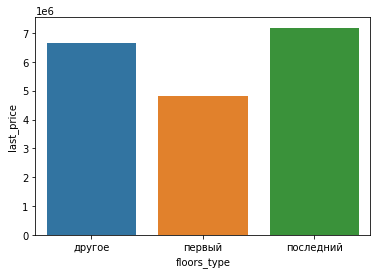

In [ ]:
sns.barplot(x='floors_type',y='last_price',ci=None,data=data)

График показывает,что есть зависимоть цены квартиры от этажа,на первом этаже квартиры дешевле,чем на последнем,это скорее обусловленно тем,что никто не шумит сверху и не может затопить

In [ ]:
month_pivot = data.pivot_table(index='month_posted',values='last_price',aggfunc='median')

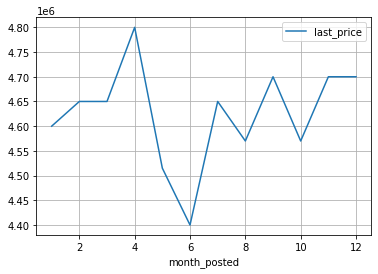

In [ ]:
month_pivot.plot(grid=True);

График показывает,что цена возросла в апреле месяце,затем упала в июне и снова возрасла ближе к августу, нет смысла верить этому графику, потому что в месяца падения цены был спад количества публикаций

In [ ]:
year_pivot = data.pivot_table(index='year_posted',values='last_price',aggfunc='median')

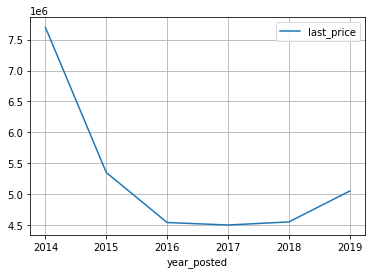

In [ ]:
year_pivot.plot(grid=True);

График говорит о том,что в промежутке с 2014 до 2016 года цена сильно упала

In [ ]:
day_pivot = data.pivot_table(index='day_posted',values='last_price',aggfunc='median')

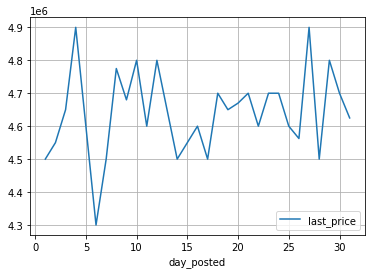

In [ ]:
day_pivot.plot(grid=True);

Тоже нет смысла достоверно верить этому графику,потому что на пики приходятся бОльшее кол-во публикаций в день

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km,day_posted
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.0,7
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0,4
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14.0,20
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другое,7.0,24
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.0,19


 Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
big_name = data.pivot_table(index='locality_name',values='price_square_meter',aggfunc=['mean','count'])

In [ ]:
big_name.columns = ['price_square_meter','ads_sum']

In [ ]:
big_name2 = big_name.sort_values(by='ads_sum',ascending=False).head(10)

In [ ]:
big_name2

,price_square_meter,ads_sum
locality_name,,
санкт-петербург,114833.088420,15710
поселок мурино,85681.762601,556
поселок шушары,78677.364217,440
всеволожск,68654.473986,398
пушкин,103125.819291,369
колпино,75424.579098,338
поселок парголово,90175.913458,327
гатчина,68746.146763,307
деревня кудрово,92473.547576,299


In [ ]:
big_name2.sort_values(by='price_square_meter',ascending=False)

,price_square_meter,ads_sum
locality_name,,
санкт-петербург,114833.088420,15710
пушкин,103125.819291,369
деревня кудрово,92473.547576,299
поселок парголово,90175.913458,327
поселок мурино,85681.762601,556
поселок шушары,78677.364217,440
колпино,75424.579098,338
гатчина,68746.146763,307
всеволожск,68654.473986,398


Населённый пункт с самой высокой ценой за кв.м. в топ 10 населенных пунктов по кол-ву объявлений - санкт-петербург,а с самой маленькой - выборг

Вычисляем среднюю цену одного км.до центра города в СПБ.

In [ ]:
spb = data[data['locality_name'] =='санкт-петербург'].copy()

In [ ]:
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_posted,month_posted,year_posted,floors_type,center_km,day_posted
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другое,16.0,7
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14.0,20
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другое,7.0,24
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8.0,19
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другое,12.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,False,False,9.10,2.0,санкт-петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,другое,16.0,28
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,False,False,False,6.00,0.0,санкт-петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,другое,6.0,19
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,False,False,10.60,1.0,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,другое,4.0,13
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другое,4.0,21


In [ ]:
spb_km_pivot = spb.pivot_table(index='center_km',values='last_price')

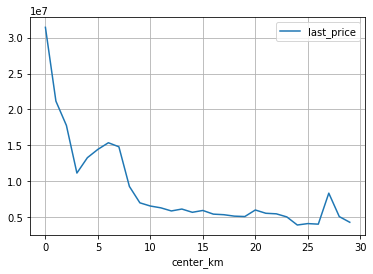

In [ ]:
spb_km_pivot.plot(grid=True);

График показывает,что чем ближе квартира находится к центру города,тем цена на неё дороже
Есть предположение,что цена на отметке от 3 до 6 км за счёт того,что всё таки центр не сильно далеко,но там более спокойно и появляются больше районов,в которых дома находятся ближе к мед.учереждениям,школам,дедским садам,что повышает цену. И цена возрастает на отметке от 26 до 28 скорей всего из-за того,что аэропорт находится в достаточной близости и где всё ещё не шумно.

### Общий вывод

Иследование показало:
1)многие люди не заполнили данные о квартире корректно,что повлияло на некоторые метрики,например высота потолков, квадратуры кухни и этажность-эти факторы влияют на ценообразование.
2)Большинство квартир продаётся в СПБ
3)Цена на квартиру завист квадратура квартиры,от этажа, как близко к центру квартира находится и кол-во комнат.
4)Цена никак не зависит от дня и месяца публикации объявления,да есть пики в те дни\месяца когда кол-во объявлений возрастает,но это скорее некая загруженность людей в остальные дни\месяцы
5)Цена за 1кв.м. значительно выше в СПБ по сравнению с другими регионами(цена составляет 114833 за кв.м),самая дешёвая цена за 1кв.м. в топ 10 по кол-ву объявлений городов - это Выборг(цена составляет 58142 за кв.м)
6)Медианное значение продажи квартиры составляет 95 дней

